In [1]:
import pandas as pd
df=pd.read_csv("train.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [2]:
df.shape

(8523, 12)

# Preprocessing

In [3]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
df1=df

In [5]:
## As we see that Item_weight and Outlet_size has some NULL values so Handle them

In [6]:
## As Item_weight is continous values so replace them with the mean of that column
import numpy as np
df1["Item_Weight"].replace(np.nan,df1["Item_Weight"].mean(),inplace=True)

In [7]:
df1["Item_Weight"].isna().sum()

0

In [8]:
## As Outlet_size has Discreste value so replace them with the mode
print(df1["Outlet_Size"].mode())
df1["Outlet_Size"].replace(np.NaN,df1["Outlet_Size"].mode()[0],inplace=True)

0    Medium
dtype: object


In [9]:
df1["Outlet_Size"].isna().sum()

0

In [10]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\ADITYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

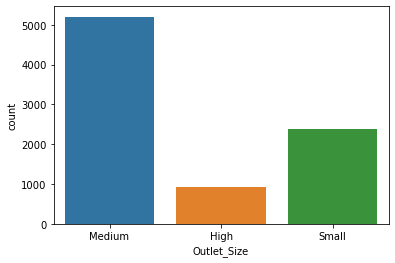

In [12]:
## As we see Medium Outlet_size is maximum
sns.countplot(df1["Outlet_Size"])

In [13]:
df2=df1.groupby("Item_Fat_Content")
df2.size()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
dtype: int64

In [14]:
## As we see LF,Low Fat and low fat represent the same thing so represent them with same name

In [15]:
df3=df1

In [16]:
df3["Item_Fat_Content"]=df3["Item_Fat_Content"].replace("LF","Low Fat")

In [17]:
df3["Item_Fat_Content"]=df3["Item_Fat_Content"].replace("low fat","Low Fat")
df2=df3.groupby("Item_Fat_Content")
df2.size()

Item_Fat_Content
Low Fat    5517
Regular    2889
reg         117
dtype: int64

In [18]:
## Check mean

In [19]:
df3.groupby("Outlet_Size").mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Size,,,,,
High,13.006148,0.059957,141.425982,1987.000000,2298.995256
Medium,12.834465,0.064828,140.466578,2000.120507,2283.730470
Small,12.850191,0.071383,141.970209,1997.072864,1912.149161


In [20]:
k=df3.groupby("Outlet_Size").Item_Outlet_Sales.mean()
print(k.index)
print(k.values)

Index(['High', 'Medium', 'Small'], dtype='object', name='Outlet_Size')
[2298.99525558 2283.73046992 1912.14916131]


<AxesSubplot:xlabel='Outlet_Size'>

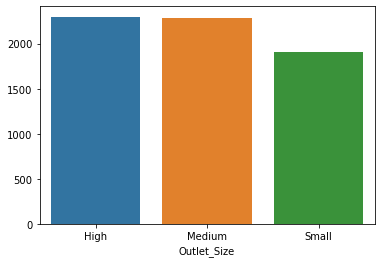

In [21]:
sns.barplot(x=k.index,y=k.values)

In [22]:
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
df_items=df3.groupby("Item_Type").Item_Outlet_Sales.sum()
df_items

Item_Type
Baking Goods             1.265525e+06
Breads                   5.532372e+05
Breakfast                2.322990e+05
Canned                   1.444151e+06
Dairy                    1.522594e+06
Frozen Foods             1.825735e+06
Fruits and Vegetables    2.820060e+06
Hard Drinks              4.577934e+05
Health and Hygiene       1.045200e+06
Household                2.055494e+06
Meat                     9.175656e+05
Others                   3.255176e+05
Seafood                  1.488682e+05
Snack Foods              2.732786e+06
Soft Drinks              8.928977e+05
Starchy Foods            3.514013e+05
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Type'>

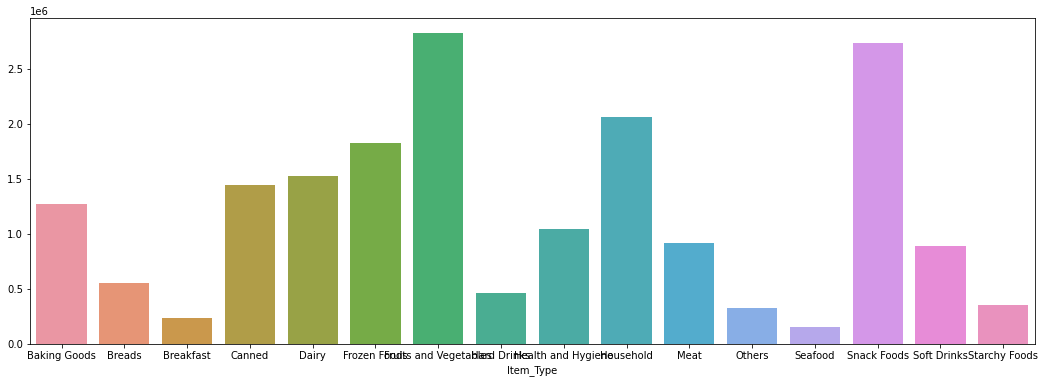

In [24]:
# As we see that the sale of Fruits and Vegitables, snack Foods are maximum
plt.figure(figsize=(18,6))
sns.barplot(x=df_items.index,y=df_items.values)

In [25]:
df_location=df3.groupby("Outlet_Location_Type").Item_Outlet_Sales.sum()
df_location

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Location_Type'>

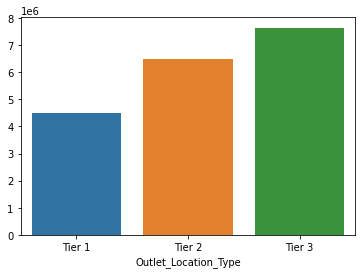

In [26]:
# Tier 3 has maximum sales
sns.barplot(x=df_location.index,y=df_location.values)

In [27]:
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


C:\Users\ADITYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

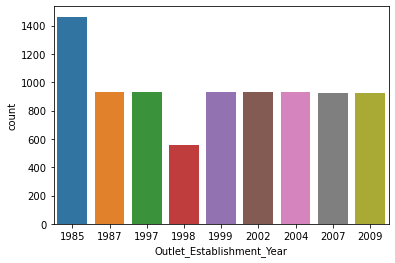

In [28]:
# As we see that in 1985 maximum number of Outlet_Establishment 
sns.countplot(df3["Outlet_Establishment_Year"])

<AxesSubplot:xlabel='Outlet_Type'>

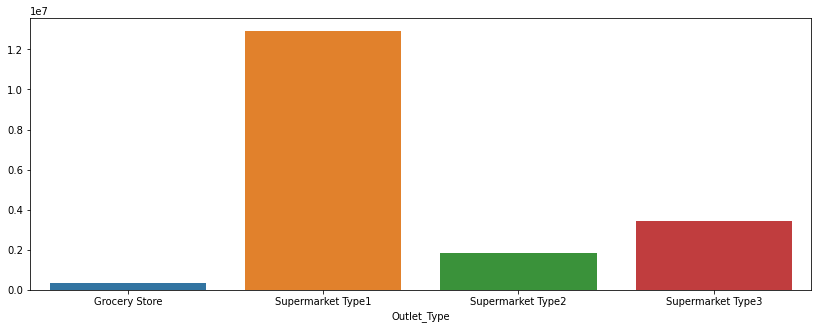

In [29]:
# Super market type 1 has maximum sales
plt.figure(figsize=(14,5))
df_Outlet_Type=df3.groupby("Outlet_Type").Item_Outlet_Sales.sum()
sns.barplot(x=df_Outlet_Type.index,y=df_Outlet_Type.values)

# One Hot Encoding of data

In [30]:
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
df3["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [33]:
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(df3[['Item_Type','Outlet_Establishment_Year','Outlet_Type','Outlet_Location_Type','Outlet_Type']]).toarray())

In [34]:
enc_data.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [35]:
df4=df3
df4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [37]:
df4.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Item_Visibility','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1,inplace=True)

In [38]:
df4.head()

,Item_Weight,Item_MRP,Item_Outlet_Sales
0,9.30,249.8092,3735.1380
1,5.92,48.2692,443.4228
2,17.50,141.6180,2097.2700
3,19.20,182.0950,732.3800
4,8.93,53.8614,994.7052


In [39]:
df5=df4.join(enc_data)

In [40]:
df5.head()

,Item_Weight,Item_MRP,Item_Outlet_Sales,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,34,35
0,9.30,249.8092,3735.1380,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,48.2692,443.4228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.50,141.6180,2097.2700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,182.0950,732.3800,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,8.93,53.8614,994.7052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [41]:
y=df5["Item_Outlet_Sales"]
x=df5.drop(['Item_Outlet_Sales'],axis=1)

In [42]:
x.head()

,Item_Weight,Item_MRP,0,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
0,9.30,249.8092,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,48.2692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.50,141.6180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,182.0950,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,8.93,53.8614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [43]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# Model Building

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [45]:
x_train.head()

,Item_Weight,Item_MRP,0,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
4962,12.150000,254.7698,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4664,9.195000,85.9566,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6694,20.100000,110.4228,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3276,20.850000,104.5648,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3484,12.857645,153.1024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [46]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pre=model1.predict(x_test)

In [48]:
y_pre

array([3416.78066737,  867.37050495, 4003.48764323, ..., 3609.09013417,
       1090.69056717, 2648.84713158])

In [49]:
y_test

3363    3572.0170
5958     679.1160
5775    6543.4824
5092     229.7010
7262    4380.9640
          ...    
1836     569.2590
8058     667.1316
2634    4447.5440
510      774.9912
1179     303.6048
Name: Item_Outlet_Sales, Length: 2131, dtype: float64

In [50]:
model1.score(x_test,y_test)

0.5537972832917821

In [51]:
model1.fit(x,y)

LinearRegression()

## Test On Testing data

In [52]:
df_test=pd.read_csv("test.csv")
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [53]:
df_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [54]:
df1_test=df_test

In [55]:
## As Item_weight is continous values so replace them with the mean of that column
import numpy as np
df1_test["Item_Weight"].replace(np.nan,df1_test["Item_Weight"].mean(),inplace=True)

In [57]:
## As Outlet_size has Discreste value so replace them with the mode
print(df1_test["Outlet_Size"].mode())
df1_test["Outlet_Size"].replace(np.NaN,df1_test["Outlet_Size"].mode()[0],inplace=True)

0    Medium
dtype: object


In [58]:
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(df1_test[['Item_Type','Outlet_Establishment_Year','Outlet_Type','Outlet_Location_Type','Outlet_Type']]).toarray())

In [59]:
df2_test=df1_test
df2_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [60]:
df2_test.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Item_Visibility','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1,inplace=True)

In [62]:
df3_test=df2_test.join(enc_data)

In [63]:
df3_test.head()

,Item_Weight,Item_MRP,0,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
0,20.750000,107.8622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8.300000,87.3198,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,14.600000,241.7538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,7.315000,155.0340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,12.695633,234.2300,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [64]:
y_predicted=model1.predict(df3_test)

In [65]:
y_predicted

array([1836.37202608, 1498.07214538, 1883.85288712, ..., 1831.58190265,
       3546.87664981, 1276.81313972])